In [24]:
# Python program to illustrate 
# corner detection with 
# Shi-Tomasi Detection Method
    
# organizing imports 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import random
import pandas as pd
import math
import itertools
import numpy as np
from shapely.geometry import Polygon

%matplotlib inline

In [305]:
vb_files = glob.glob('/Users/tmcsween21/Documents/radiospinomics/data/msk/dl/vb/*.png')
# place db_files in a dataframe
df = pd.DataFrame(vb_files, columns=['file'])
df['filename'] = df['file'].apply(lambda x: x.split('/')[-1])
df['level'] = df['filename'].apply(lambda x: x.split('-')[0])
df['id'] = df['filename'].apply(lambda x: x.split('-')[1])
df['slice'] = df['filename'].apply(lambda x: x.split('_IMG')[-1])
df = df.groupby(['id','slice'])['file'].apply(list).reset_index(name="all_levels")



In [ ]:
for index, row in df.iterrows():
    for i, level in enumerate(row['all_levels']):
        img = cv2.imread(level)

    # read image
    img = cv2.imread(row['all_levels'][0], 0)
    # convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # convert to float32
    gray = np.float32(gray)
    # detect corners
    corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 10)
    corners = np.int0(corners)
    # iterate through all the corners and draw them on the image
    for i in corners:
        x, y = i.ravel()
        cv2.circle(img, (x, y), 3, 255, -1)
    # show image
    plt.imshow(img), plt.show()
    break

### Step 1

- Get 4 corners of the VB
- Get the most anterior and posterior points of the IVD

### Step 2

- Get the VB area (pixels)
- Get the IVD area (pixels)

### Step 3 

- Get the mid points betweem VBsa / VBsi and VBsp / VBip
- Get the Euclidian distance between these two points = **VB diameter**

### Step 4 

- 

/Users/tmcsween21/Documents/radiospinomics/data/msk/dl/vb/L1_VB-P0741_13261_IMG00007.png


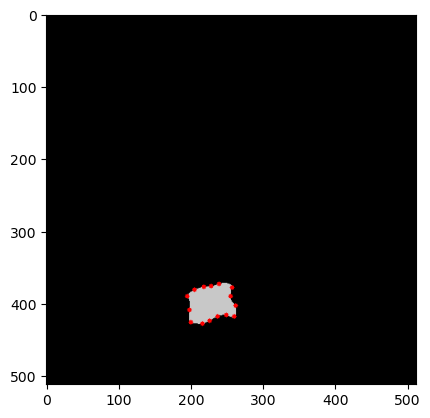

In [325]:
# path to input image specified and  
# image is loaded with imread command

# select a random file from vb_files
file = random.choice(vb_files)
print(file)
file = "/Users/tmcsween21/Documents/radiospinomics/data/msk/dl/vb/L5_VB-P0741_14175_IMG00007.png"
img = cv2.imread(file)
grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(grayimg, (3,3), 0)

  
# Shi-Tomasi corner detection function
# We are detecting only 100 best corners here
# You can change the number to get desired result.
corners = cv2.goodFeaturesToTrack(grayimg, 20, 0.01, 10)
  
# convert corners values to integer
# So that we will be able to draw circles on them
corners = np.int0(corners)
# find_corners(corners)
# print(corners)
  
# draw red color circles on all corners
for i in corners:
    x, y = i.ravel()
    cv2.circle(img, (x, y), 3, (255, 0, 0), -1)
  
# resulting image
plt.imshow(img)
  
# De-allocate any associated memory usage  
# if cv2.waitKey(0) & 0xff == 27: 
#     cv2.destroyAllWindows()

/Users/tmcsween21/Documents/radiospinomics/data/msk/dl/vb/S1_VB-P0741_8605_IMG00005.png
/Users/tmcsween21/Documents/radiospinomics/data/msk/dl/vb/S1_VB-P0741_13079_IMG00007.png
/Users/tmcsween21/Documents/radiospinomics/data/msk/dl/vb/L5_VB-P0741_21821_IMG00005.png
/Users/tmcsween21/Documents/radiospinomics/data/msk/dl/vb/L5_VB-P0741_13338_IMG00005.png
/Users/tmcsween21/Documents/radiospinomics/data/msk/dl/vb/L4_VB-P0741_18285_IMG00004.png
/Users/tmcsween21/Documents/radiospinomics/data/msk/dl/vb/S1_VB-P0741_2014_IMG00005.png
/Users/tmcsween21/Documents/radiospinomics/data/msk/dl/vb/L4_VB-P0741_5465_IMG00006.png
/Users/tmcsween21/Documents/radiospinomics/data/msk/dl/vb/L5_VB-P0741_13548_IMG00006.png
/Users/tmcsween21/Documents/radiospinomics/data/msk/dl/vb/L5_VB-P0741_19529_IMG00005.png
/Users/tmcsween21/Documents/radiospinomics/data/msk/dl/vb/S1_VB-P0741_14749_IMG00005.png
/Users/tmcsween21/Documents/radiospinomics/data/msk/dl/vb/L4_VB-P0741_4740_IMG00005.png
/Users/tmcsween21/Documen

KeyboardInterrupt: 

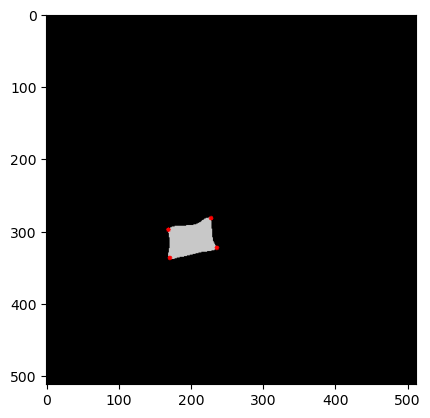

In [554]:

# file = "/Users/tmcsween21/Documents/radiospinomics/data/msk/dl/vb/L5_VB-P0741_14175_IMG00007.png"
# file = "/Users/tmcsween21/Documents/radiospinomics/data/msk/dl/vb/L3_VB-P0741_5853_IMG00005.png"
# file = "/Users/tmcsween21/Documents/radiospinomics/data/msk/dl/vb/L4_VB-P0741_21265_IMG00004.png"
# file = "/Users/tmcsween21/Documents/radiospinomics/data/msk/dl/vb/L4_VB-P0741_17360_IMG00006.png"

# best = []
# file = random.choice(vb_files)
vb_files = glob.glob('/Users/tmcsween21/Documents/radiospinomics/data/msk/dl/vb/*.png')
# remove vb_files containing L1 or L2 or L3

vb_files = [x for x in vb_files if "L1" not in x]
vb_files = [x for x in vb_files if "L2" not in x]
vb_files = [x for x in vb_files if "L3" not in x]

for file in vb_files:
    print(file)
    img = cv2.imread(file)
    grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    blur = cv2.GaussianBlur(grayimg, (3,3), 0)

    # Shi-Tomasi corner detection function
    # We are detecting only 100 best corners here
    # You can change the number to get desired result.
    corners = cv2.goodFeaturesToTrack(grayimg, 20, 0.01, 10)
    # convert corners values to integer
    # So that we will be able to draw circles on them
    corners = np.int0(corners)
    # print(corners)

    # Trying "largest surface area of 4 point polygon approach":


    coordinatesOnly = corners
    rectangles = []

    # Returns True if l0 and l1 are within 10% deviation
    side1 = []
    side2 = []
    side3 = []
    side4 = []
    diagonal1 = []
    diagonal2 = []
    diagonals = []
    areas = []
    coordinates = []
    for p in itertools.combinations(np.array(coordinatesOnly),4):
        for r in itertools.permutations(p,4):

            # print(r)
            # concatenate the points in r into a single array
            array = np.concatenate(r)
            # print(array)

            # l01 = np.linalg.norm(r[1]-r[0]) # Side
            # l12 = np.linalg.norm(r[2]-r[1]) # Side
            # l23 = np.linalg.norm(r[3]-r[2]) # Side
            # l30 = np.linalg.norm(r[0]-r[3]) # Side
            # l02 = np.linalg.norm(r[2]-r[0]) # Diagonal
            # l13 = np.linalg.norm(r[1]-r[3]) # Diagonal
            # # add the rectangle to the list

            # side1.append(l01)
            # side2.append(l12)
            # side3.append(l23)
            # side4.append(l30)
            # diagonal1.append(l02)
            # diagonal2.append(l13)
            pgon = Polygon(array)
            area = pgon.area
            # print(area)

            # diagonal_sum = l02 + l13
            # diagonals.append(diagonal_sum)
            coordinates.append(r)
            areas.append(area)

    best_corners = coordinates[areas.index(max(areas))]
    # best.append(best_corners)
    # print(best_corners)


    for i in best_corners:
        x, y = i.ravel()
        cv2.circle(img, (x, y), 3, (255, 0, 0), -1)

    # resulting image
    # plt.subplot(1, 2, 1)
    plt.imshow(img)
    #  save plot
    name = file.split("/")[-1]
    plt.savefig('/Users/tmcsween21/Desktop/testing/{0}'.format(name))

    # for i in corners:
    #     x, y = i.ravel()
    #     cv2.circle(img, (x, y), 3, (255, 0, 0), -1)

    # # resulting image
    # plt.subplot(1, 2, 2)
    # plt.imshow(img)


In [501]:
print(best)

[(array([[261, 387]]), array([[210, 412]]), array([[193, 372]]), array([[253, 356]])), (array([[261, 387]]), array([[210, 412]]), array([[193, 372]]), array([[253, 356]])), (array([[261, 387]]), array([[210, 412]]), array([[193, 372]]), array([[253, 356]])), (array([[261, 387]]), array([[210, 412]]), array([[193, 372]]), array([[253, 356]])), (array([[261, 387]]), array([[210, 412]]), array([[193, 372]]), array([[253, 356]])), (array([[261, 387]]), array([[210, 412]]), array([[193, 372]]), array([[253, 356]])), (array([[261, 387]]), array([[210, 412]]), array([[193, 372]]), array([[253, 356]])), (array([[261, 387]]), array([[210, 412]]), array([[193, 372]]), array([[253, 356]])), (array([[261, 387]]), array([[210, 412]]), array([[193, 372]]), array([[253, 356]])), (array([[261, 387]]), array([[210, 412]]), array([[193, 372]]), array([[253, 356]])), (array([[261, 387]]), array([[210, 412]]), array([[193, 372]]), array([[253, 356]])), (array([[261, 387]]), array([[210, 412]]), array([[19

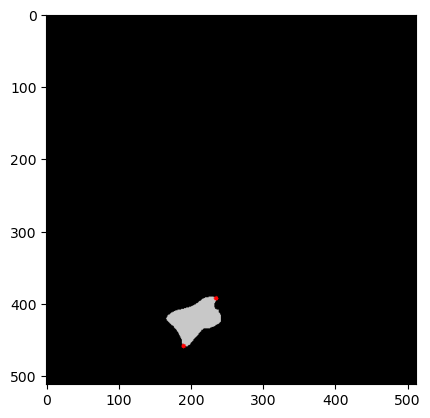

In [501]:


  
# Shi-Tomasi corner detection function
# We are detecting only 100 best corners here
# You can change the number to get desired result.
corners = cv2.goodFeaturesToTrack(grayimg, 2, 0.01, 30)
  
# convert corners values to integer
# So that we will be able to draw circles on them
corners = np.int0(corners)
  
# draw red color circles on all corners
for i in corners:
    x, y = i.ravel()
    cv2.circle(img, (x, y), 3, (255, 0, 0), -1)
  
# resulting image
plt.imshow(img)
  

/Users/tmcsween21/Documents/radiospinomics/data/msk/dl/vb/L3_VB-P0741_19227_IMG00005.png
left: (158, 249)
right: (235, 290)
top: (190, 243)
bottom: (166, 297)


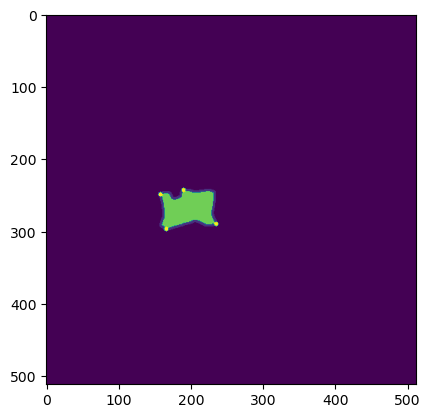

In [46]:
file = random.choice(vb_files)
print(file)
# file = "/Users/tmcsween21/Documents/radiospinomics/data/msk/dl/vb/S1_VB-P0741_13021_IMG00004.png"
# file = "/Users/tmcsween21/Documents/radiospinomics/data/msk/dl/vb/L5_VB-P0741_14422_IMG00005.png"
img = cv2.imread(file)
grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(grayimg, (3,3), 0)

# Find contours
cnts = cv2.findContours(blur, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
c = max(cnts, key=cv2.contourArea)

# Obtain outer coordinates
left = tuple(c[c[:, :, 0].argmin()][0])
right = tuple(c[c[:, :, 0].argmax()][0])
top = tuple(c[c[:, :, 1].argmin()][0])
bottom = tuple(c[c[:, :, 1].argmax()][0])

# Draw dots onto image
cv2.drawContours(grayimg, [c], -1, (36, 255, 12), 2)
cv2.circle(grayimg, left, 3, (255, 255, 0), -1)
cv2.circle(grayimg, right, 3, (255, 255, 0), -1)
cv2.circle(grayimg, top, 3, (255, 50, 0), -1)
cv2.circle(grayimg, bottom, 3, (255, 255, 0), -1)

print('left: {}'.format(left))
print('right: {}'.format(right))
print('top: {}'.format(top))
print('bottom: {}'.format(bottom))
plt.imshow(blur)
plt.imshow(grayimg)


In [ ]:
# from a set of points, find the 4 corners furthest from each other
def find_corners(points):
    # get the top left point
    tl = points[0]
    for point in points:
        if point[0] < tl[0] and point[1] < tl[1]:
            tl = point
    # get the top right point
    tr = points[0]
    for point in points:
        if point[0] > tr[0] and point[1] < tr[1]:
            tr = point
    # get the bottom left point
    bl = points[0]
    for point in points:
        if point[0] < bl[0] and point[1] > bl[1]:
            bl = point
    # get the bottom right point
    br = points[0]
    for point in points:
        if point[0] > br[0] and point[1] > br[1]:
            br = point
    return [tl, tr, bl, br]

# find the corners of the image

file = random.choice(vb_files)
print(file)
# file = "/Users/tmcsween21/Documents/radiospinomics/data/msk/dl/vb/S1_VB-P0741_13021_IMG00004.png"
# file = "/Users/tmcsween21/Documents/radiospinomics/data/msk/dl/vb/L5_VB-P0741_14422_IMG00005.png"
img = cv2.imread(file)
grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(grayimg, (3,3), 0)

# Find contours
cnts = cv2.findContours(blur, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
c = max(cnts, key=cv2.contourArea)

# Obtain outer coordinates





In [25]:
ivd_files = glob.glob('/Users/tmcsween21/Documents/radiospinomics/data/msk/dl/ivd/*.png')


/Users/tmcsween21/Documents/radiospinomics/data/msk/dl/ivd/L2_L3_IVD-P0741_14976_IMG00006.png
[0.9929607] [0.11844429] [207.20589] [214.23529]
199.02967834472656 214.1862335205078 24.698284149169922 88.39122009277344 95.10804748535156
5.1080474853515625


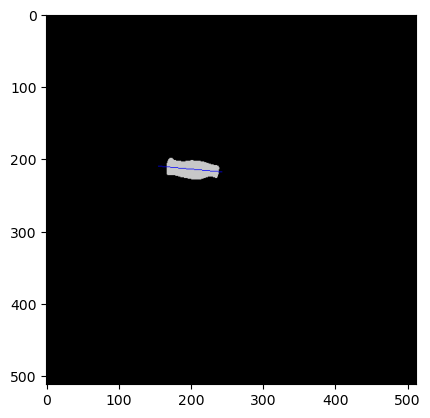

In [28]:
file = random.choice(ivd_files)
print(file)
img = cv2.imread(file)
grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find largest contour
contours = cv2.findContours(grayimg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
big_contour = max(contours, key=cv2.contourArea)

# fit contour to ellipse and get ellipse center, minor and major diameters and angle in degree 
ellipse = cv2.fitEllipse(big_contour)
[vx,vy,x,y] = cv2.fitLine(big_contour, cv2.DIST_L2,0,0.01,0.01)
print(vx,vy,x,y)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
img = cv2.line(img,(cols-1,righty),(0,lefty),(0,255,0),2)
(xc,yc),(d1,d2),angle = ellipse
print(xc,yc,d1,d2,angle)

# draw ellipse
result = img.copy()
# cv2.ellipse(result, ellipse, (0, 255, 0), 3)

# draw circle at center
xc, yc = ellipse[0]
# cv2.circle(result, (int(xc),int(yc)), 10, (255, 255, 255), -1)

# draw vertical line
# compute major radius
rmajor = max(d1,d2)/2
if angle > 90:
    angle = angle - 90
else:
    angle = angle + 90
print(angle)
xtop = xc + math.cos(math.radians(angle))*rmajor
ytop = yc + math.sin(math.radians(angle))*rmajor
xbot = xc + math.cos(math.radians(angle+180))*rmajor
ybot = yc + math.sin(math.radians(angle+180))*rmajor
cv2.line(result, (int(xtop),int(ytop)), (int(xbot),int(ybot)), (0, 0, 255), 1)

plt.imshow(grayimg)
plt.imshow(result)


/Users/tmcsween21/Documents/radiospinomics/data/msk/dl/ivd/L1_L2_IVD-P0741_20468_IMG00004.png
512
[[9.7825146e-01]
 [2.0742257e-01]
 [2.5118571e+02]
 [1.2671429e+02]]
[0.97825146] [0.20742257] [251.18571] [126.71429]
73
182


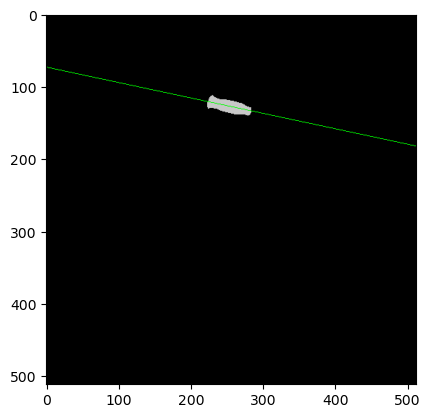

In [87]:
file = random.choice(ivd_files)
print(file)
img = cv2.imread(file)
grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find largest contour
contours = cv2.findContours(grayimg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
big_contour = max(contours, key=cv2.contourArea)
# print(big_contour)

rows,cols = img.shape[:2]
print(cols)
[vx,vy,x,y] = cv2.fitLine(big_contour, cv2.DIST_L2,0,0.01,0.01)
fit_line = cv2.fitLine(big_contour, cv2.DIST_L2,0,0.01,0.01)
print(fit_line)

print(vx,vy,x,y)
lefty = int((-x*vy/vx) + y)
print(lefty)
righty = int(((cols-x)*vy/vx)+y)
print(righty)
img = cv2.line(img,(cols,righty),(0,lefty),(0,255,0),1)



plt.imshow(img)

In [60]:
from shapely.wkt import loads
lin = loads('LineString (289.63171806167395061 -200.22555066079294761, 380.69030837004402201 -65.28898678414094547)')
pol = loads('Polygon ((112.23259911894263041 -229.94933920704846742, 178.75726872246687549 -113.4132158590308137, 309.44757709251092592 -114.35682819383258391, 376.44405286343607031 -230.42114537444933831, 305.67312775330390195 -344.59823788546259493, 176.39823788546246419 -345.07004405286346582, 112.23259911894263041 -229.94933920704846742))')
# the LinearRing
from shapely.geometry import LineString
polin = LineString(list(pol.exterior.coords))
# intersection 
pt = polin.intersection(lin)
print(pt.wkt)


POINT (327.02683172946365 -144.81102988883518)


In [457]:
#  subset a list based on a string
def subset_list(list, string):
    return [s for s in list if string in s]

ivd_files = glob.glob('/Users/tmcsween21/Documents/radiospinomics/data/msk/dl/ivd/*.png')

# subset list

test = subset_list(ivd_files, "P0741_1578_IMG00005.png")

print(test)


['/Users/tmcsween21/Documents/radiospinomics/data/msk/dl/ivd/L2_L3_IVD-P0741_1578_IMG00005.png', '/Users/tmcsween21/Documents/radiospinomics/data/msk/dl/ivd/L3_L4_IVD-P0741_1578_IMG00005.png', '/Users/tmcsween21/Documents/radiospinomics/data/msk/dl/ivd/L4_L5_IVD-P0741_1578_IMG00005.png', '/Users/tmcsween21/Documents/radiospinomics/data/msk/dl/ivd/L5_S1_IVD-P0741_1578_IMG00005.png', '/Users/tmcsween21/Documents/radiospinomics/data/msk/dl/ivd/L1_L2_IVD-P0741_1578_IMG00005.png']


/var/folders/8l/dkxhdycd15d4pt_h700hp40h0000gq/T/ipykernel_7661/817989036.py:37: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  print(intersection.type)
/var/folders/8l/dkxhdycd15d4pt_h700hp40h0000gq/T/ipykernel_7661/817989036.py:38: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if intersection.type == "LineString":


LineString
10.186629759944777
[(512, 240), (0, 148)]
[(512, 240), (0, 148)]
LineString
1.5662911869830478
[(512, 270), (0, 256)]
[(512, 270), (0, 256)]
LineString
-6.241914347415048
[(512, 306), (0, 362)]
[(512, 306), (0, 362)]
LineString
-36.00074895416072
[(512, 228), (0, 600)]
[(512, 228), (0, 600)]
LineString
8.224081131844091
[(512, 169), (0, 95)]
[(512, 169), (0, 95)]


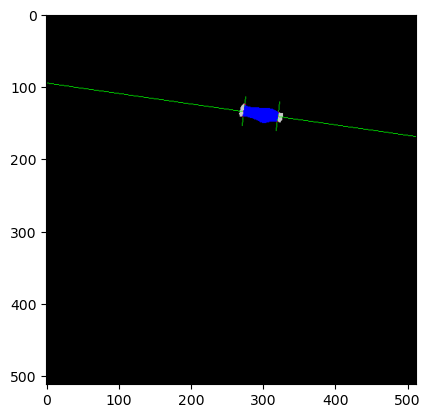

In [462]:
import shapely

for file in test:
    # file = random.choice(ivd_files)
    # print(file)
    # file = "/Users/tmcsween21/Documents/radiospinomics/data/msk/dl/ivd/L5_S1_IVD-P0741_17147_IMG00004.png"
    # file = "/Users/tmcsween21/Documents/radiospinomics/data/msk/dl/ivd/L2_L3_IVD-P0741_21498_IMG00006.png"
    msk = cv2.imread(file)
    grayimg = cv2.cvtColor(msk, cv2.COLOR_BGR2GRAY)

    # Get the polygon points from the mask
    contours = cv2.findContours(grayimg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]
    big_contour = max(contours, key=cv2.contourArea)

    # Fit a line to the shape
    [vx,vy,x,y] = cv2.fitLine(big_contour, cv2.DIST_L2,0,0.01,0.01)

    # Convert the cv2 contour to a shapely polygon
    contour = np.squeeze(big_contour)
    polygon = Polygon(contour)
    shapely_poly = shapely.geometry.Polygon(contour)

    # Convert the cv2 line to a shapely line
    rows,cols = msk.shape[:2]
    lefty = int((-x*vy/vx) + y)
    righty = int(((cols-x)*vy/vx)+y)
    line = [(cols,righty), (0,lefty)]
    # print(line)
    shapely_line = shapely.geometry.LineString(line)

    # Plot the line and polygon
    img = cv2.line(msk,(cols,righty),(0,lefty),(0,255,0),1)

    # Find the intersection points
    intersection = shapely_poly.intersection(shapely_line)
    print(intersection.type)
    if intersection.type == "LineString":
        print(intersection.coords)
        x0 = intersection.coords[0][0]
        y0 = intersection.coords[0][1]
        x1 = intersection.coords[1][0]
        y1 = intersection.coords[1][1]
    elif intersection.type == "MultiLineString":
        coords = np.asarray([l.coords for l in intersection.geoms])
        x0 = coords[:,0][0][0]
        y0 = coords[:,0][0][1]
        x1 = coords[:,-1][-1][0]
        y1 = coords[:,-1][-1][1]

    # print(coords.shape)
    # print(coords)
    # print(coords[:,0][0])
    # print(coords[:,-1][-1])


    # print(x0,y0,x1,y1)

    # Find the angle of the line
    theta = math.atan2((y1 - y0), (x1 - x0))
    slope = (y1 - y0)/(x1 - x0)
    theta = math.atan(slope)

    print(math.degrees(theta))

    start_point = (x0, y0)
    end_point = (x1, y1)

    # Find the distance between the points
    IVD_length = math.sqrt((x1 - x0)**2 + (y1 - y0)**2)
    distance_a = IVD_length * 0.1
    distance_b = IVD_length * 0.9

    def get_point_on_vector(initial_pt, terminal_pt, distance):
        v = np.array(initial_pt, dtype=float)
        u = np.array(terminal_pt, dtype=float)
        n = v - u
        n /= np.linalg.norm(n, 2)
        point = v - distance * n

        return tuple(point)

    point_a = get_point_on_vector(start_point, end_point, distance = distance_a)
    point_b = get_point_on_vector(start_point, end_point, distance = distance_b)

    # Plot the line and polygon
    cv2.circle(img, (int(point_a[0]), int(point_a[1])), 1, (255, 0, 0), -1)
    cv2.circle(img, (int(point_b[0]), int(point_b[1])), 1, (255, 0, 0), -1)

    # Find the perpendicular lines
    perp_slope = -1.0 / slope

    length = 20
    angle = math.atan(perp_slope)
    start = shapely.geometry.Point(point_a[0] - length * math.cos(angle),
                                point_a[1] - length * math.sin(angle))
    end = shapely.geometry.Point(point_a[0] + length * math.cos(angle),
                                point_a[1] + length * math.sin(angle))
    line_a = shapely.geometry.LineString([start, end])
    print(line)

    cv2.line(img,(int(start.x),int(start.y)),(int(end.x),int(end.y)),(0,255,0),1)

    start = shapely.geometry.Point(point_b[0] - length * math.cos(angle),
                                point_b[1] - length * math.sin(angle))
    end = shapely.geometry.Point(point_b[0] + length * math.cos(angle),
                                point_b[1] + length * math.sin(angle))
    line_b = shapely.geometry.LineString([start, end])
    print(line)

    cv2.line(img,(int(start.x),int(start.y)),(int(end.x),int(end.y)),(0,255,0),1)

    intersection_a = shapely_poly.intersection(line_a)

    # Plot the line and polygon
    cv2.circle(img, (int(intersection_a.coords[0][0]), int(intersection_a.coords[0][1])), 1, (255, 0, 0), -1)
    cv2.circle(img, (int(intersection_a.coords[1][0]), int(intersection_a.coords[1][1])), 1, (255, 0, 0), -1)

    intersection_b = shapely_poly.intersection(line_b)

    # Plot the line and polygon
    cv2.circle(img, (int(intersection_b.coords[0][0]), int(intersection_b.coords[0][1])), 1, (255, 0, 0), -1)
    cv2.circle(img, (int(intersection_b.coords[1][0]), int(intersection_b.coords[1][1])), 1, (255, 0, 0), -1)

    # Cut the polygon by the two new lines:
    from shapely.ops import linemerge, unary_union, polygonize
    from shapely.geometry import LineString, Polygon

    def cut_polygon_by_line(polygon, line):
        merged = linemerge([polygon.boundary, line])
        borders = unary_union(merged)
        polygons = polygonize(borders)
        return list(polygons)

    polygons_a = cut_polygon_by_line(shapely_poly, line_a)
    polygons_b = cut_polygon_by_line(shapely_poly, line_b)
    polygons = polygons_a + polygons_b

    # find the polygons that intersect and return the largest one = this is the area of the central IVD
    indexes = [0, 1, 2, 3]
    pairs = [(a, b) for idx, a in enumerate(indexes) for b in indexes[idx + 1:]]
    intersections = []

    for pair in pairs:
        intersection = polygons[pair[0]].intersection(polygons[pair[1]])
        intersections.append(intersection)
    largest = max(intersections, key=lambda x: x.area)


    # Plot the line and polygon
    # cv2.fillPoly(img, [np.array(polygons_a[1].exterior.coords).astype(np.int32)], (0, 0, 255))
    # cv2.fillPoly(img, [np.array(polygons_b[0].exterior.coords).astype(np.int32)], (0, 0, 255))
    cv2.fillPoly(img, [np.array(largest.exterior.coords).astype(np.int32)], (0, 0, 255))
    plt.imshow(img)

In [420]:

indexes = [0, 1, 2, 3]
pairs = [(a, b) for idx, a in enumerate(indexes) for b in indexes[idx + 1:]]
pairs

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]